In [1]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from scipy.constants import * 
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy: 1.19.2
matplotlib: 3.3.2


In [2]:
# lambda_L = 830*10**(-9) #[m] wavelength of triangular lattice beam in Segstock group 
lambda_L=1064*10**(-9) #[m]QMBD
h_bar = h/(2*np.pi) #Converted Plank constant
mrb = 87*10**(-3)/N_A #[kg] atom mass of 87Rb
a = 2/3*lambda_L
Omega = 2*np.pi*1.2*1e3 #[Hz] Shaking frequency

In [3]:
y_list = np.linspace(0, 2,100)*a
K_list = mrb*a*Omega/h_bar*y_list
Jv_list = jv(0, K_list)

x = np.linspace(0,2, 100)*a
y = np.linspace(0,2, 100)*a
X, Y = np.meshgrid(x, y)
Z = list(map(lambda vx, vy: jv(0,  mrb*a*Omega/(2*h_bar)*np.sqrt(9*vx**2+vy**2)), X,Y))

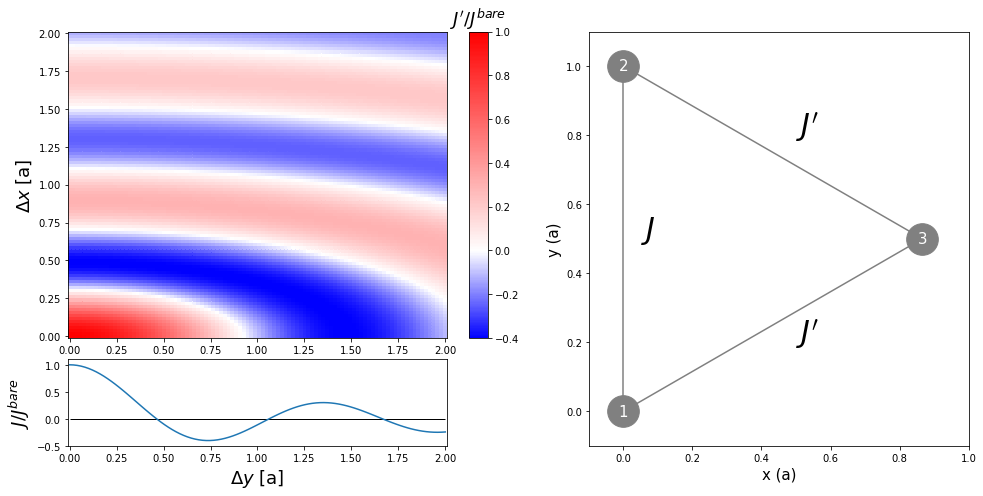

In [70]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[14,7])
ax1 = fig.add_subplot(1,2,1)
mappable = ax1.pcolormesh(Y/a,X/a,Z, cmap='bwr', norm=norm, shading='Auto') 
ax1.set_ylabel(r'$\Delta x$ [a]', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.plot(y_list/a,Jv_list)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\Delta y$ [a]',size=18)
ax1X.set_ylim(-0.5, 1.1)
ax1X.hlines(y=0,xmin=0, xmax=2, colors='black', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)

site_position_x = np.array([0,0,np.sqrt(3)/2])
site_position_y = np.array([0,1,1/2])
text_position_x = np.array([0.05, 0.5, 0.5])
text_position_y = np.array([0.5, 0.8, 0.2])
text_list = [r"$J$", r"$J'$", r"$J'$"]
line_1_x = np.zeros(100)
line_1_y = np.linspace(0,site_position_y[1],100)
line_2_x = np.linspace(0,site_position_x[2])
line_2_y = 1/np.sqrt(3)*line_2_x
line_3_x = line_2_x
line_3_y = -1/np.sqrt(3)*line_3_x +1

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(site_position_x, site_position_y, s = 1000, c='gray')
ax2.plot(line_1_x, line_1_y, line_2_x, line_2_y, line_3_x, line_3_y, c='gray')
ax2.set_aspect('equal')
for i in range(len(text_list)):
    ax2.text(text_position_x[i], text_position_y[i], text_list[i], fontsize = 30)
    ax2.text(site_position_x[i], site_position_y[i], str(i+1), verticalalignment="center",horizontalalignment="center", c = "white", fontsize= 15)
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('x (a)', fontsize = 15)
ax2.set_ylabel('y (a)', fontsize = 15)
plt.tight_layout()

In [5]:
controlVoltageToAM = 0 #[V] control voltage from NI-DAQ to WF1968 mod. in via buffer amp
modulationSignalVpp = 5.0 #[V] Amplitude of modulation singal
bufferAmpForAM = 1/8 # gain of buffer amp for modulatin sinal
coeffInPM = 130

In [6]:
phaseModAmplitude = (controlVoltageToAM*bufferAmpForAM+1)/2*modulationSignalVpp/2*coeffInPM #[degree]
dx = phaseModAmplitude/360*a*np.sin(np.pi/2)
dy = phaseModAmplitude/360*a*np.sin(np.pi*0)

In [7]:
k=mrb*a*Omega/h_bar*dy
kp = mrb*a*Omega/(2*h_bar)*np.sqrt(9*dx**2+dy**2)
j = jv(0,k)
jp = jv(0,kp)
amp = np.sqrt(dx**2+dy**2)
alpha = np.arcsin(dy/amp)
print('K=%.02f'%(k))
print('Kp=%.02f'%(kp))
print('J/J_bare=%.02f'%(j))
print('Jp/J_bare=%.02f'%(jp))
print('Amplitude=%.02f'%(amp/a)+"[a]")
print('theta = %.02f'%(alpha*180/np.pi)+"[degree]")

K=0.00
Kp=3.52
J/J_bare=1.00
Jp/J_bare=-0.38
Amplitude=0.45[a]
theta = 0.00[degree]


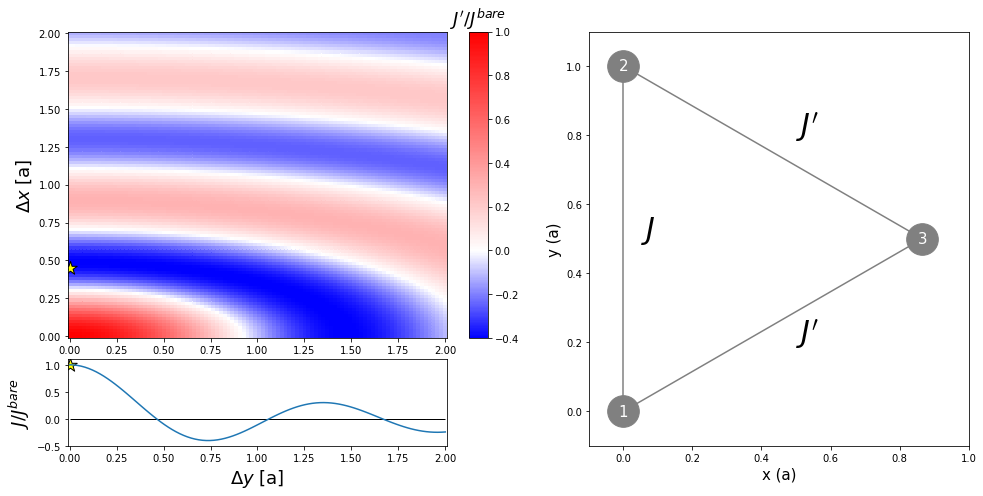

In [78]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[14,7])
ax1 = fig.add_subplot(1,2,1)
mappable = ax1.pcolormesh(Y/a,X/a,Z, cmap='bwr', norm=norm, shading='Auto') 
ax1.set_ylabel(r'$\Delta x$ [a]', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.plot(y_list/a,Jv_list)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\Delta y$ [a]',size=18)
ax1X.set_ylim(-0.5, 1.1)
ax1X.hlines(y=0,xmin=0, xmax=2, colors='black', linewidths=1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontsize=18)
ax1.scatter(dy/a, dx/a, c="yellow", edgecolors = "black", marker="*", s = 200)
ax1X.scatter(dy/a, j, c="yellow", edgecolors="black", marker="*", s = 200)


site_position_x = np.array([0,0,np.sqrt(3)/2])
site_position_y = np.array([0,1,1/2])
text_position_x = np.array([0.05, 0.5, 0.5])
text_position_y = np.array([0.5, 0.8, 0.2])
text_list = [r"$J$", r"$J'$", r"$J'$"]
line_1_x = np.zeros(100)
line_1_y = np.linspace(0,site_position_y[1],100)
line_2_x = np.linspace(0,site_position_x[2])
line_2_y = 1/np.sqrt(3)*line_2_x
line_3_x = line_2_x
line_3_y = -1/np.sqrt(3)*line_3_x +1

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(site_position_x, site_position_y, s = 1000, c='gray')
ax2.plot(line_1_x, line_1_y, line_2_x, line_2_y, line_3_x, line_3_y, c='gray')
ax2.set_aspect('equal')
for i in range(len(text_list)):
    ax2.text(text_position_x[i], text_position_y[i], text_list[i], fontsize = 30)
    ax2.text(site_position_x[i], site_position_y[i], str(i+1), verticalalignment="center",horizontalalignment="center", c = "white", fontsize= 15)
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('x (a)', fontsize = 15)
ax2.set_ylabel('y (a)', fontsize = 15)
plt.tight_layout()